# Implementing a Convolutional Neural Network (CNN) in Keras for Image Classification

In this notebook, we demonstrate the implementation of a Convolutional Neural Network (CNN) using TensorFlow and Keras for image classification on the Fashion MNIST dataset. Our goal is to classify fashion items into different categories.

## Steps Covered:

1. **Importing Libraries and Checking TensorFlow Version**
2. **Loading the Fashion MNIST Dataset**
3. **Understanding the Data**
4. **Visualizing the Data**
5. **Data Preprocessing**
6. **Building the CNN Model**
7. **Compiling the Model**
8. **Training the Model**
9. **Saving the Model**
10. **Making Predictions**
11. **Defining Class Names**
12. **Visualizing Results**

Each step is explained in detail with accompanying code in separate code cells below. Let's get started!

In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we'll load the Fashion MNIST dataset.

In [38]:
print(tf.__version__)


2.13.0


In [39]:
(X_train, Y_train), (X_test, Y_test)  = tf.keras.datasets.fashion_mnist.load_data()


Now, let's take a look at the data.



In [40]:
print("Shape of training data:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

print("\nShape of testing data:")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

print("\nTotal Size:")
print(f"The Size of images {X_train[0].shape}")

Shape of training data:
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

Shape of testing data:
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)

Total Size:
The Size of images (28, 28)


We'll start by visualizing a random sample of 20 images from the training dataset.

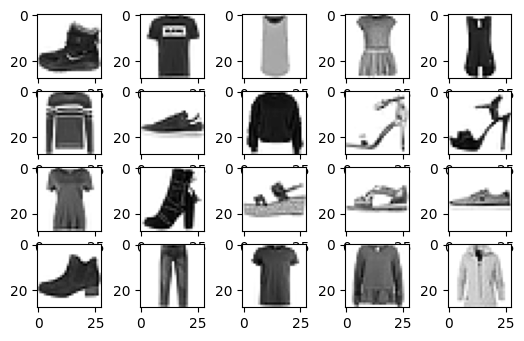

In [41]:
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap=plt.cm.binary)


After that, we'll prepare the data for training.

In [42]:
X_train=(X_train/255).astype("float32")
X_test=(X_test/255).astype("float32")

In [43]:
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel),end=" ")
    print("\n")

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 0.090 0.000 0.000 0.000 0.000 

Now, we'll preprocess the data.



In [44]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_train=X_train.reshape(X_train.shape[0],28,28,1)

Next, we'll build the CNN model.



In [45]:
model=tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(28,28,1)),
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 32)         

We'll compile the model next.



In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

It's time to train the model.



In [47]:
model.fit(X_train,Y_train,epochs=25,batch_size=32   ,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 66s 42ms/step - loss: 0.6814 - accuracy: 0.7523 - val_loss: 0.4963 - val_accuracy: 0.8185
Epoch 2/25
1500/1500 [==============================] - 49s 33ms/step - loss: 0.4687 - accuracy: 0.8320 - val_loss: 0.4452 - val_accuracy: 0.8366
Epoch 3/25
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4152 - accuracy: 0.8496 - val_loss: 0.4036 - val_accuracy: 0.8495
Epoch 4/25
1500/1500 [==============================] - 77s 51ms/step - loss: 0.3804 - accuracy: 0.8605 - val_loss: 0.3816 - val_accuracy: 0.8604
Epoch 5/25
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3547 - accuracy: 0.8696 - val_loss: 0.3693 - val_accuracy: 0.8670
Epoch 6/25
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3359 - accuracy: 0.8777 - val_loss: 0.3621 - val_accuracy: 0.8662
Epoch 7/25
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3193 - accuracy: 0.8833 - val_loss: 0.3635 -

We'll save the trained model for future use.



In [48]:
model.save("save model/06 Image Classfication.h5")

c:\Users\laptop zone\miniconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
predication=model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


Let's make predictions on a random test image.



In [64]:
import random
random_index = random.randint(0, len(X_test))
image=X_test[random_index]
predication=model.predict(image.reshape([1,28,28,1]))
print(predication)


1/1 [==============================] - 0s 55ms/step
[[3.1616952e-04 3.3719871e-06 1.6509879e-02 3.6207642e-04 4.1013964e-02
  1.5272279e-05 9.4176024e-01 2.8387344e-06 6.1000187e-06 9.9602439e-06]]


Now, we'll define class names.



In [65]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predication.argmax()

6

Finally, let's visualize the results.



####################################
Shirt
####################################


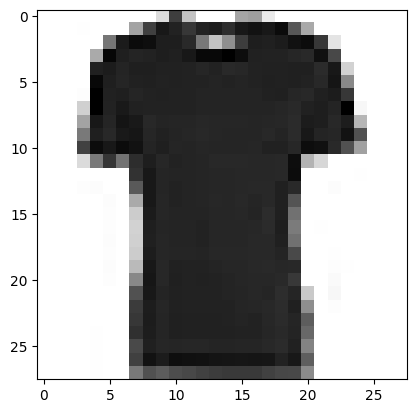

In [66]:
predicted_class_index = predication.argmax()
predicted_class_name = class_names[predicted_class_index]

plt.imshow(X_train[random_index],cmap=plt.cm.binary)
print("####################################")
print(predicted_class_name)
print("####################################")




---

## Implementing a Convolutional Neural Network (CNN) in Keras for Image Classification

In this code, we demonstrate the implementation of a Convolutional Neural Network (CNN) using TensorFlow and Keras for image classification on the Fashion MNIST dataset. Our goal is to classify fashion items into different categories.

### Steps Covered:

1. **Importing Libraries and Checking TensorFlow Version**: We import necessary libraries such as TensorFlow, pandas, numpy, and matplotlib, and check the version of TensorFlow.
   
2. **Loading the Fashion MNIST Dataset**: We load the Fashion MNIST dataset, which consists of 60,000 training images and 10,000 testing images of fashion items. The dataset is divided into training and testing sets.

3. **Understanding the Data**: We print the shapes of the training and testing data to understand their dimensions.

4. **Visualizing the Data**: We visualize a random sample of 20 images from the training dataset using matplotlib.

5. **Data Preprocessing**: We preprocess the data by rescaling the pixel values to the range of [0, 1] and converting the data type to float32. We also reshape the data to have a single channel (grayscale images) and normalize it.

6. **Building the CNN Model**: We define the architecture of the CNN model using the Sequential API from Keras. The model consists of convolutional layers with ReLU activation, max-pooling layers, and a fully connected layer with a softmax activation function.

7. **Compiling the Model**: We compile the model by specifying the optimizer, loss function, and evaluation metric.

8. **Training the Model**: We train the model on the training data for a specified number of epochs with a defined batch size and validation split.

9. **Saving the Model**: We save the trained model for future use.

10. **Making Predictions**: We make predictions on a random test image and display the predicted class label.

11. **Defining Class Names**: We define the class names corresponding to the different fashion items.

12. **Visualizing Results**: We visualize the random test image along with the predicted class label.

This code provides a practical implementation of a CNN for image classification using TensorFlow and Keras, demonstrating the essential steps involved in building and training a CNN model.